<a href="https://colab.research.google.com/github/bofori-tech/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Copy_of_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [ ]:
# which libraries should we import here?
import math
import numpy as np
import pandas as pd

In [ ]:
#Finding the mean
sales=[3505, 2400, 3027, 2798, 3700, 3250, 2689]
total = sum(sales)
mean_sales = total/len(sales)
print("mean sales: ", mean_sales)

mean sales:  3052.714285714286


In [ ]:
#Find variance
# first write a little function 
def subtract_mean(number):
    return number-mean_sales

lambda x: x-mean_sales


<function __main__.<lambda>>

In [ ]:
# use `map` to apply that function to our list 
distances = list(map(subtract_mean, sales))

In [ ]:
# square and sum all of those distances
squared_distances = list(map(lambda x: x**2, distances))

In [ ]:
# how long is our list?
list_length=len(squared_distances) 

In [ ]:
# calculate variance
variance_sales = sum(squared_distances)/list_length
print('{:.2f}'.format(variance_sales,3))

183761.06


In [ ]:
#standard deviation
print('{:.2f}'.format(math.sqrt(variance_sales)))

428.67


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [ ]:
customers=[127, 80, 105, 92, 120, 115, 93]

In [ ]:
#using numpy
print('{:.2f}'.format(np.cov(sales, customers)[0][1]))

7604.36


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [ ]:
#using pandas
df=pd.DataFrame({'sales': sales})
df1=pd.DataFrame({'customers': customers})

In [ ]:
#For correlation coefficient
#calculate standard dev for both sales and customers.
std_s = df['sales'].std(ddof=1)
std_c = df1['customers'].std(ddof=1)
print('{:.4f}'.format(std_s))
print('{:.4f}'.format(std_c))

463.0204
17.0573


In [ ]:
#Covariance
cov_sc = df['sales'].cov(df1['customers'])
print('{:.4f}'.format(cov_sc))

7604.3571


In [ ]:
#calculate denominator
denom = std_s*std_c

In [ ]:
#calclate correlation
corr_sc=cov_sc/denom
print('{:.6f}'.format(corr_sc))

0.962834


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [ ]:
#source: https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv
titanic =pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head(2)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1


In [ ]:
#calculate the covariance for the entire dataset
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [ ]:
#calculate correlation of the dataset
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [ ]:
#Synonym for orthogonal is perpendicular
# Vectors
x = np.random.randint(low=1, high=100, size=3)
y = np.random.randint(low=1, high=100, size=3)
print(x, '\n', y)

[40 41 53] 
 [83 41 99]


In [ ]:
#for length
for vect in [x,y]:
  norm=np.linalg.norm(vect)
  print('{:.2f}'.format(norm))

78.04
135.54


In [ ]:
#using array broadcasting for calculate dot product
(x[0]*y[0]) + (x[1]*y[1])+(x[2]*y[2])

10248

In [ ]:
x.dot(y)

10248

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
vec_1 = [3,3]
vec_2 = [1, -1]

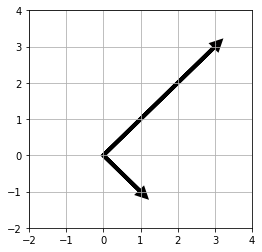

In [ ]:
#set up the figure for symmetrical x and y
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,4)          
plt.ylim(-2,4)

# Plot the vectors
for vect in [vec_1, vec_2]:
    plt.arrow(0,0, vect[0], vect[1], head_width=.2, head_length=0.2, linewidth=4)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [ ]:
# if dot product = 0, then vectors are orthogonal
a= np.array([-5,3,7])
b= np.array([6,-8,2])
np.dot(a,b)
#These vectors are not orthogonal

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [ ]:
c = np.array([[2],[-15],[6],[20]])
norm_c = np.linalg.norm(c)

print("Norm of c:", norm_c)

Norm of c: 25.787593916455254


In [ ]:
c = np.array([[2],[-15],[6],[20]])
c1 = np.array([[2],[-15],[6],[20]])

In [ ]:
# Find C*C
(2*2) + (-15*-15) + (6*6)+(20*20)

665

In [ ]:
c = np.array([[2,-15,6,20]])
pd.DataFrame(c)

,0,1,2,3
0,2,-15,6,20


In [ ]:
pd.DataFrame(c.T)

,0
0,2
1,-15
2,6
3,20


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [ ]:
f=[4,12,11,9,2]

In [ ]:
#how long
norm_f=np.linalg.norm(f)
print('{:.4f}'.format(norm_f))

19.1311


In [ ]:
#unit vector
f_hat = f/np.linalg.norm(f)
print(f_hat)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [ ]:
vector_1= [-.7, 2.5]
vector_2=np.multiply(vector_1, 2)
print(vector_1, '\n', vector_2)

[-0.7, 2.5] 
 [-1.4  5. ]


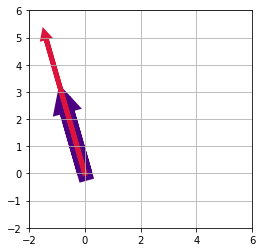

In [ ]:
#plot the vectors
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,6)          
plt.ylim(-2,6)

for myvect, mycolor, width in [(vector_1, 'indigo', 15), (vector_2, 'crimson', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

In [ ]:
# Linearly independent vectors, not orthogonal
vector_1 = np.random.randint(low=-2, high=3.5, size=2)
vector_2 = np.random.randint(low=-3, high=3, size=2)
print(vector_1, '\n', vector_2)

[ 0 -1] 
 [-1 -2]


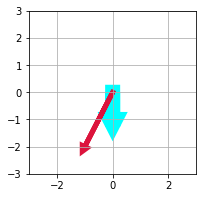

In [ ]:
# Set up the grid
fig, ax = plt.subplots(figsize=(3,3))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)

# Plot the vectors
for myvect, mycolor, width in [(vector_1, 'cyan', 15), (vector_2, 'crimson', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [ ]:
# Let's take two vectors.
vector_1 = np.array([1,2])
vector_2 = np.array([4,8])

In [ ]:
# This is one possible linear combination:
a,b=(2,3)
linear_combo= np.multiply(vector_1, a) + np.multiply(vector_2, b) 
print(linear_combo)

[14 28]


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [ ]:
# Let's take three vectors.
vector_1 = np.array([1,2,3,])
vector_2 = np.array([-1,0,7])
vector_3 = np.array([4,8,2])

In [ ]:
# This is a set of several linear combinations:
muchos_combos=[]
for (a,b,c) in [(-2,3,4), (-4,-5,5), (6,-7,8)]:
    linear_combo = np.multiply(vector_1, a) + np.multiply(vector_2, b) + np.multiply(vector_3, c)
    muchos_combos.append(linear_combo)
print(muchos_combos)

[array([11, 28, 23]), array([ 21,  32, -37]), array([ 45,  76, -15])]


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



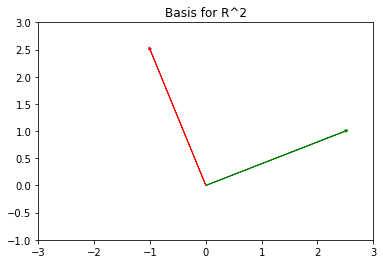

In [ ]:
# find basis vectors in 2-d
vector_1 = [-1, 2.5]
vector_2 = [2.5, 1]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [ ]:
import numpy as np
v1 = np.array([[1,2,3],[-1,0,7],[4,8,2]])
np.linalg.matrix_rank(v1)

3

## 7.2 What does the rank of a matrix tell us?

Rank tells us the number of linearly independent vectors in the row space of a matrix

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [ ]:
#original vector
v=np.array([1,3])
w=np.array([-1,2])

In [ ]:
#dot product
w_dot_v=np.dot(v, w)
v_dot_v=np.dot(v, v)

In [ ]:
#projection
fraction =w_dot_v/v_dot_v
projection = np.multiply(fraction,v)
print(projection)

[0.5 1.5]


In [ ]:
# Plot a line
plt.xlim(-1,4)          
plt.ylim(-1,4)
axes = plt.gca()

In [ ]:
# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


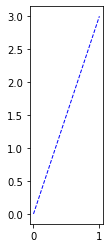

In [ ]:
# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

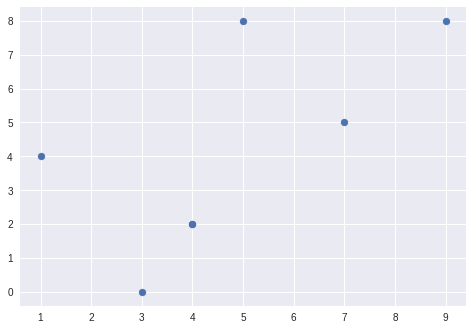

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()